In [59]:
#connexion à ggdrive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
#chargement des packages
import pandas as pd
import numpy as np

In [61]:
#import du fichier via ggdrive
#Lien perso ggdrive
file_path="/content/drive/MyDrive/projet_python/df_dating.csv"
df=pd.read_csv(file_path,sep=',')

## Liens entre les variables


In [62]:
#regrouper selon idd du candidat
#car il y a redondance des réponses par candidat selon certains critères
df_candidat = df.groupby(['iid']).first()

In [63]:
#regrouper selon pid du recruteur
#car il y a redondance des réponses par recruteur selon certains critères
df_recruteur = df.groupby(['pid']).first()

# Entre les variables quantitatives

#Corrélation entre les six attributs pour les participants

In [64]:
#sélection des attributs
df_quanti_candidat=df_candidat[['age','income','attr1_1', 'sinc1_1','intel1_1','fun1_1','amb1_1','shar1_1']]
for m in df_quanti_candidat:
  df[m] = df[m].replace(",",".")
  df[m] = pd.to_numeric(df[m], downcast="float")

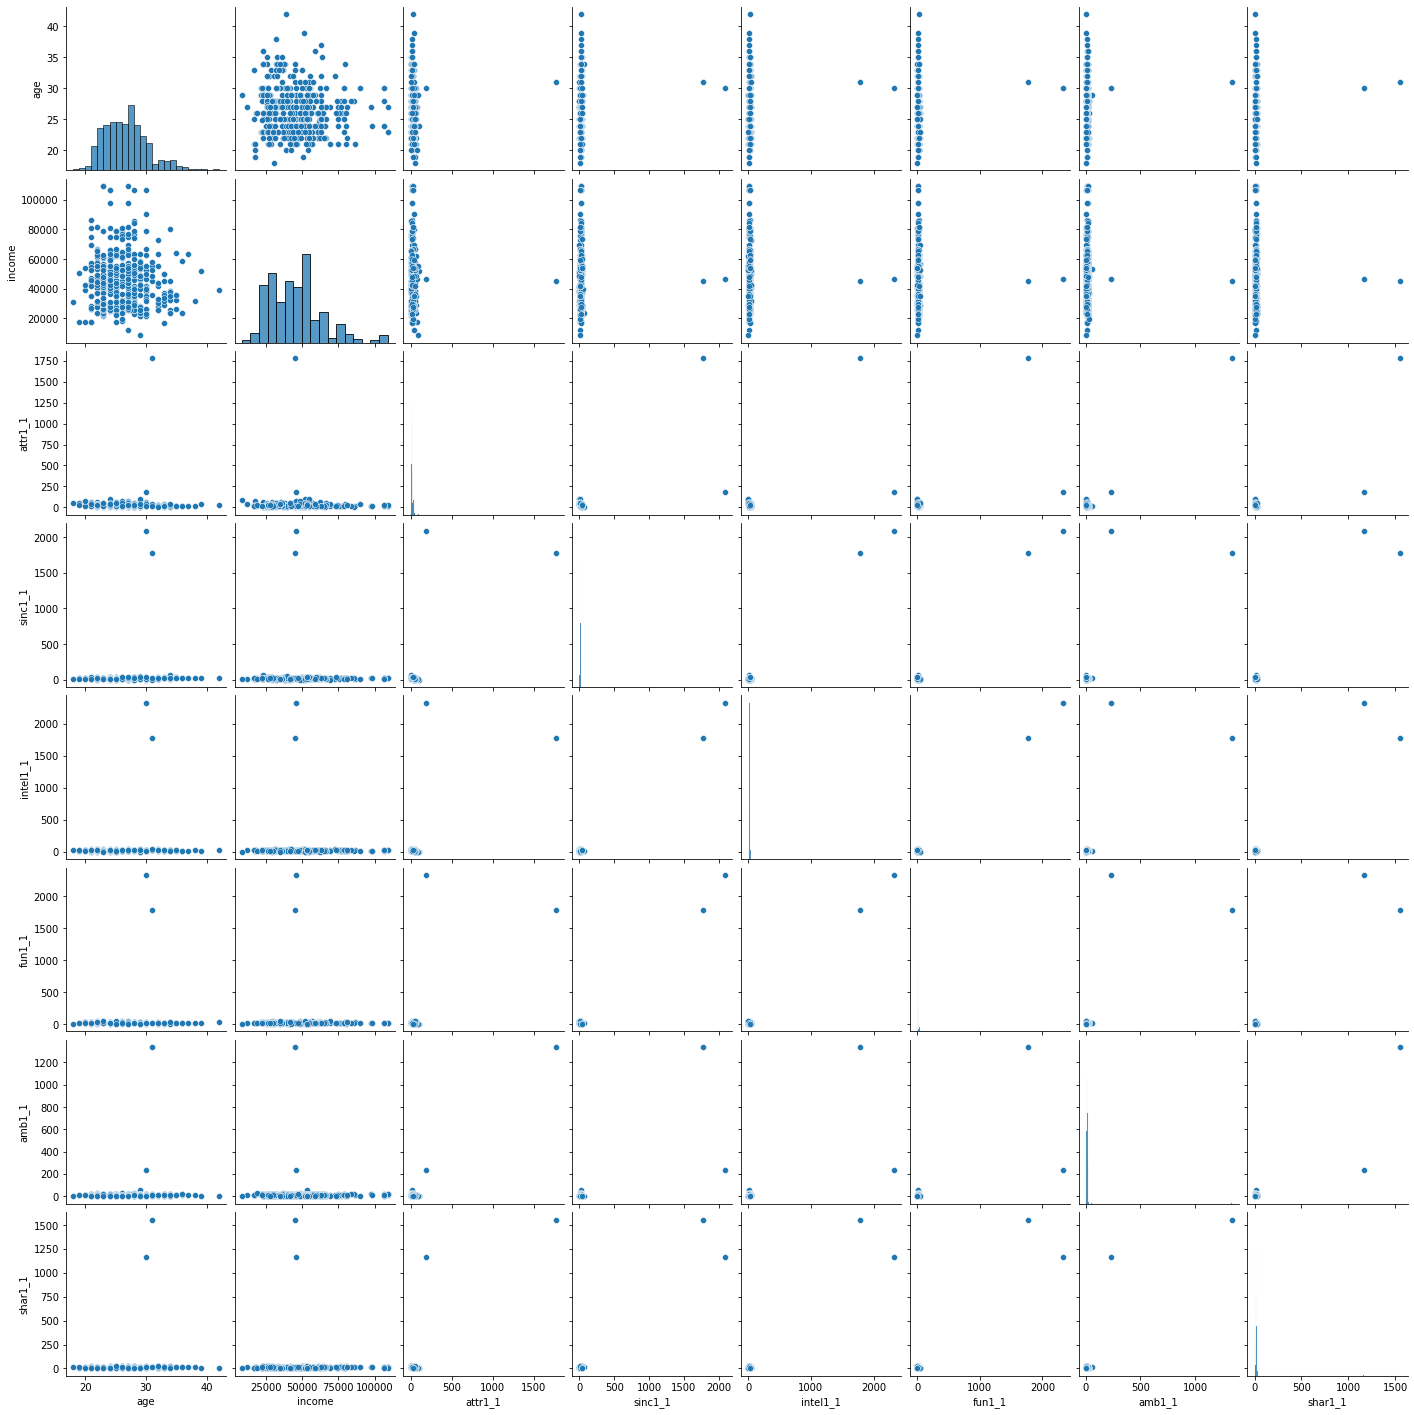

In [65]:
#Pair plot
import seaborn as sns
sns.pairplot(df_quanti_candidat.iloc[:,0:8])

[[ 1.00000000e+00 -9.74588441e-02  6.05135835e-02  8.41502317e-02
   7.73974276e-02  6.95310059e-02  6.40680219e-02  8.28147649e-02]
 [-9.74588441e-02  1.00000000e+00 -3.53107291e-03 -6.37292971e-04
   1.87842834e-03  3.16595149e-03 -3.25143448e-03  6.91126091e-04]
 [ 6.05135835e-02 -3.53107291e-03  1.00000000e+00  6.99766733e-01
   6.63940941e-01  6.65986183e-01  9.72532728e-01  8.35520940e-01]
 [ 8.41502317e-02 -6.37292971e-04  6.99766733e-01  1.00000000e+00
   9.95498681e-01  9.95658984e-01  7.58582254e-01  9.70806644e-01]
 [ 7.73974276e-02  1.87842834e-03  6.63940941e-01  9.95498681e-01
   1.00000000e+00  9.97309284e-01  7.23898573e-01  9.57464947e-01]
 [ 6.95310059e-02  3.16595149e-03  6.65986183e-01  9.95658984e-01
   9.97309284e-01  1.00000000e+00  7.24241911e-01  9.57303348e-01]
 [ 6.40680219e-02 -3.25143448e-03  9.72532728e-01  7.58582254e-01
   7.23898573e-01  7.24241911e-01  1.00000000e+00  8.83957219e-01]
 [ 8.28147649e-02  6.91126091e-04  8.35520940e-01  9.70806644e-01
   

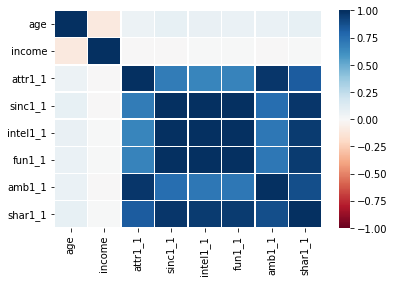

In [66]:
import seaborn as sns
#matrice A numpy – plus facile à manipuler
A=df_quanti_candidat.values
#matrice de corrélation sur les variables quantitatives
RA=np.corrcoef(A,rowvar=False)
print(RA)
#Identifier visuellement les corrélations 
sns.heatmap(RA,xticklabels=df_quanti_candidat.columns,yticklabels=df_quanti_candidat.columns,vmin=-1,vmax=+1,center=0,cmap="RdBu",linewidths=0.5)
#La variable attr1_1 est celle qui semble le plus liée aux autres (sauf pour fun) 

In [67]:
from scipy.stats import pearsonr
p_values = pd.DataFrame(index=['age','income','attr1_1', 'sinc1_1','intel1_1','fun1_1','amb1_1','shar1_1'],columns=['age','income','attr1_1', 'sinc1_1','intel1_1','fun1_1','amb1_1','shar1_1'])
for i in list(p_values.index):
  for j in list(p_values.index):
    p_values.loc[i,j]=pearsonr(df_candidat[i],df_candidat[j])[1]
print(p_values)


               age    income   attr1_1   sinc1_1  intel1_1    fun1_1  \
age            0.0   0.03834  0.199089  0.073893    0.1003  0.139959   
income     0.03834       0.0  0.940323   0.98922  0.968232  0.946484   
attr1_1   0.199089  0.940323       0.0       0.0       0.0       0.0   
sinc1_1   0.073893   0.98922       0.0       0.0       0.0       0.0   
intel1_1    0.1003  0.968232       0.0       0.0       0.0       0.0   
fun1_1    0.139959  0.946484       0.0       0.0       0.0       0.0   
amb1_1    0.173915  0.945041       0.0       0.0       0.0       0.0   
shar1_1   0.078609  0.988309       0.0       0.0       0.0       0.0   

            amb1_1   shar1_1  
age       0.173915  0.078609  
income    0.945041  0.988309  
attr1_1        0.0       0.0  
sinc1_1        0.0       0.0  
intel1_1       0.0       0.0  
fun1_1         0.0       0.0  
amb1_1         0.0       0.0  
shar1_1        0.0       0.0  


Les attributs attractive et ambitious sont fortement corrélés positivement.

Les attributs sincere, intelligent, fun1 et shared interests sont fortement corrélés positivement.

On peut donc faire le choix de ne conserver que les variables attractive, intelligent etéventuellement shared (voir box plot).

La p-value entre l'âge et l'income d'environ 3,8 % donc les variables semblent liées.

Cependant, étant donné que l'effectif est égal à 453, il faut relativiser cette conclusion. D'autant que le pourcentage de valeurs dans la colonne income dans le fichier d'origine était élevé.

On ne conservera que la variable âge pour la suite.

La variable âge n'est pas liée aux autres attributs donc elle sera conservée.

#Corrélation entre les variables quantitatives pour le recruteur

In [68]:
#sélection des variables quantitatives pour les recruteurs
df_quanti_recruteur=df_recruteur[['age_o','pf_o_att','pf_o_sin','pf_o_int','pf_o_fun','pf_o_amb','pf_o_sha']]
print(df_quanti_recruteur)

       age_o  pf_o_att  pf_o_sin  pf_o_int  pf_o_fun  pf_o_amb  pf_o_sha
pid                                                                     
1.0     21.0      15.0      20.0      20.0      15.0      15.0      15.0
2.0     24.0      45.0       5.0      25.0      20.0       0.0       5.0
3.0     25.0      35.0      10.0      35.0      10.0      10.0       0.0
4.0     23.0      20.0      20.0      20.0      20.0      10.0      10.0
5.0     21.0      20.0       5.0      25.0      25.0      10.0      15.0
...      ...       ...       ...       ...       ...       ...       ...
449.0   23.0      55.0       2.0       1.0      40.0       1.0       1.0
450.0   25.0      50.0       5.0       5.0       5.0       5.0      30.0
451.0   30.0      20.0      40.0       5.0      20.0       5.0      10.0
452.0   29.0      35.0      30.0      25.0       5.0       0.0       5.0
453.0   27.0      30.0      30.0      30.0       5.0       0.0       5.0

[462 rows x 7 columns]


In [69]:
#matrice QR numpy – plus facile à manipuler
QR=df_quanti_recruteur.values

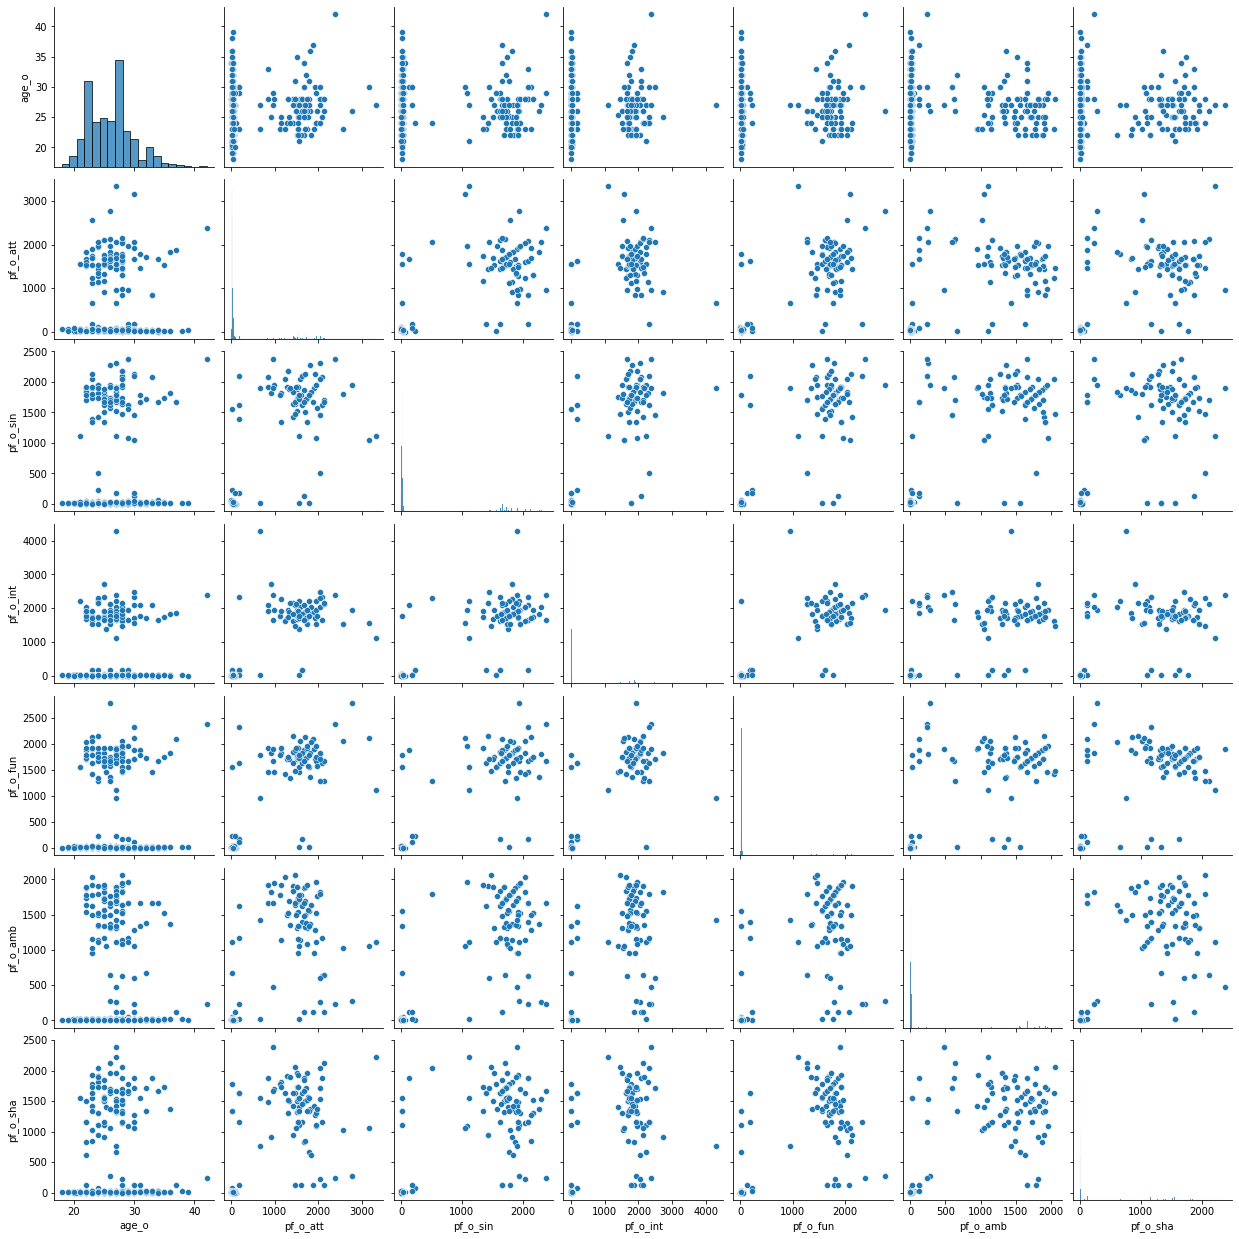

In [70]:
#Pair plot
import seaborn as sns
sns.pairplot(df_quanti_recruteur.iloc[:,0:7])

In [71]:
from scipy.linalg.decomp_qr import rq
#matrice de corrélation sur les variables quantitatives
RQR=np.corrcoef(QR,rowvar=False)
print(RQR)

[[1.         0.08625392 0.0904263  0.08475065 0.08134892 0.03785778
  0.06084573]
 [0.08625392 1.         0.8870235  0.89327473 0.91501258 0.83321226
  0.83650011]
 [0.0904263  0.8870235  1.         0.92519555 0.93733213 0.89145151
  0.86944421]
 [0.08475065 0.89327473 0.92519555 1.         0.93078765 0.85415902
  0.83956724]
 [0.08134892 0.91501258 0.93733213 0.93078765 1.         0.86859909
  0.87441569]
 [0.03785778 0.83321226 0.89145151 0.85415902 0.86859909 1.
  0.86803667]
 [0.06084573 0.83650011 0.86944421 0.83956724 0.87441569 0.86803667
  1.        ]]


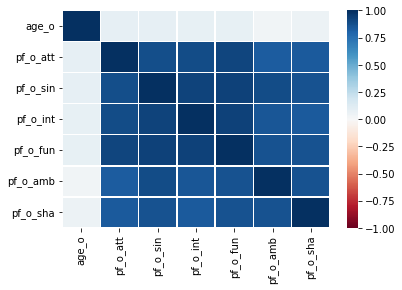

In [72]:
#Identifier visuellement les corrélations 
sns.heatmap(RQR,xticklabels=df_quanti_recruteur.columns,yticklabels=df_quanti_recruteur.columns,vmin=-1,vmax=+1,center=0,cmap="RdBu",linewidths=0.5)
#Les variables quantitatives des candidats ne sont pas corrélées

In [73]:
p_values = pd.DataFrame(index=['age_o','pf_o_att','pf_o_sin','pf_o_int','pf_o_fun','pf_o_amb','pf_o_sha'],columns=['age_o','pf_o_att','pf_o_sin','pf_o_int','pf_o_fun','pf_o_amb','pf_o_sha'])
p_values
for i in list(p_values.index):
  for j in list(p_values.index):
    p_values.loc[i,j]=pearsonr(df_recruteur[i],df_recruteur[j])[1]
print(p_values)


             age_o pf_o_att  pf_o_sin  pf_o_int  pf_o_fun  pf_o_amb  pf_o_sha
age_o          0.0  0.06397  0.052094  0.068761  0.080691  0.416901  0.191724
pf_o_att   0.06397      0.0       0.0       0.0       0.0       0.0       0.0
pf_o_sin  0.052094      0.0       0.0       0.0       0.0       0.0       0.0
pf_o_int  0.068761      0.0       0.0       0.0       0.0       0.0       0.0
pf_o_fun  0.080691      0.0       0.0       0.0       0.0       0.0       0.0
pf_o_amb  0.416901      0.0       0.0       0.0       0.0       0.0       0.0
pf_o_sha  0.191724      0.0       0.0       0.0       0.0       0.0       0.0


On retiendra les variables age_o et une seule de l'ensemble des six variables pf_o_att, pf_o_sin, pf_o_fun, pf_o_int, pf_o_amb, pf_o_sha

# Entre les variables quantitatives et la variable cible

*Question* : Y a t'il indépendance entre les échantillons de chaque groupe ?

La réponse à cette question dépend de la façon dont on a récolté les données

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

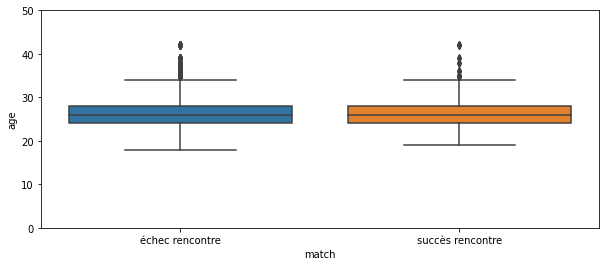

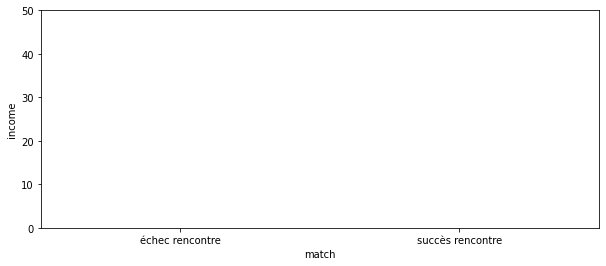

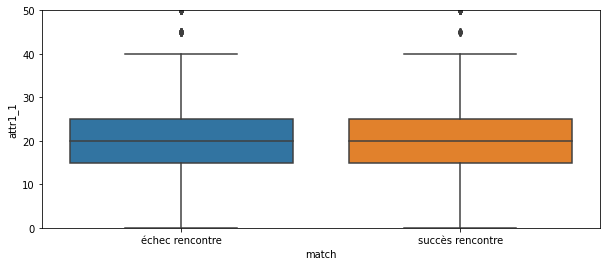

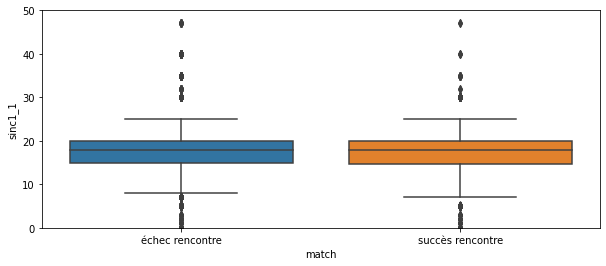

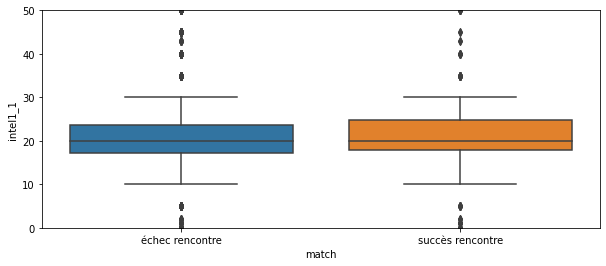

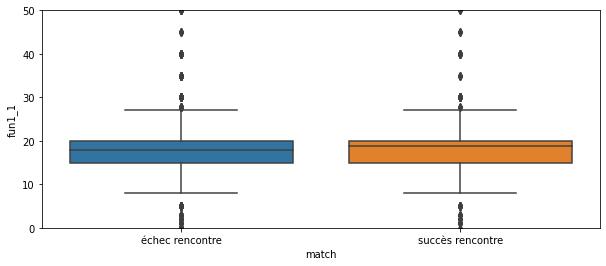

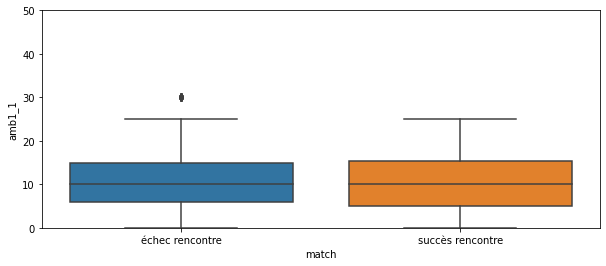

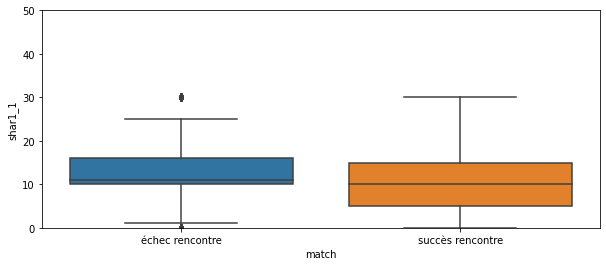

In [74]:
#première visualisation : variables quantitatives attributs du candidat et variable cible
#on a supprimé visuellement des valeurs atypiques 
#en redimentionant l'axe des ordonnées
import matplotlib.pyplot as plt

for i in list(df_quanti_candidat):
  fig, ax = plt.subplots(figsize=(10,4))
  ax.set_ylim(0,50)
  sns.boxplot("match",i, data=df)
  plt.gca().xaxis.set_ticklabels(['échec rencontre','succès rencontre'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

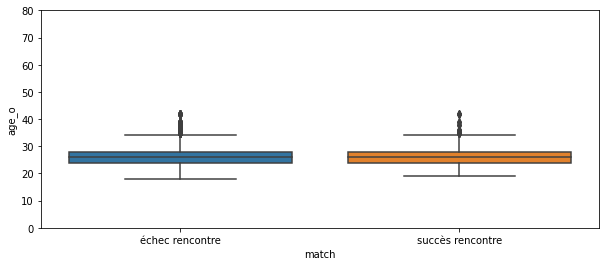

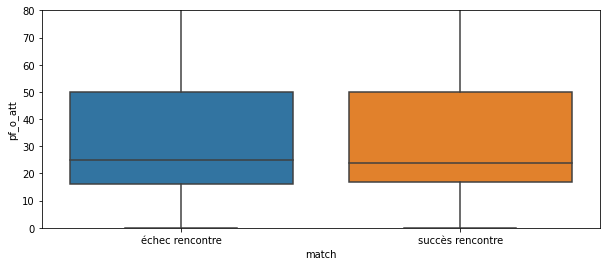

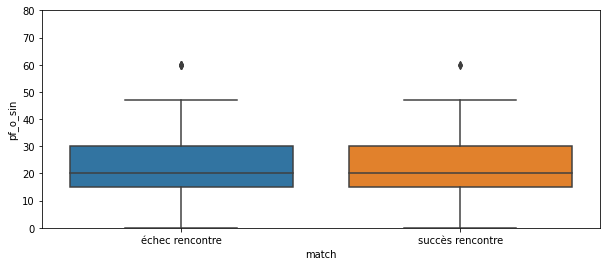

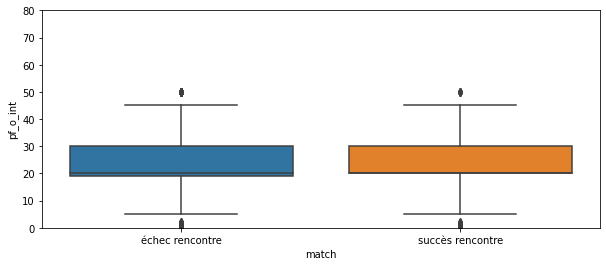

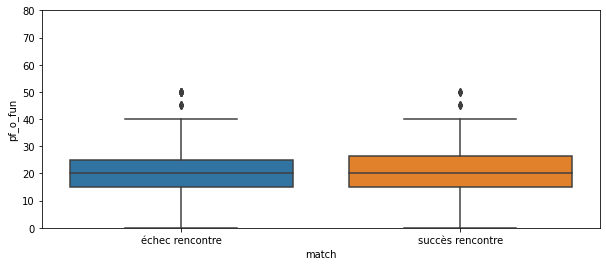

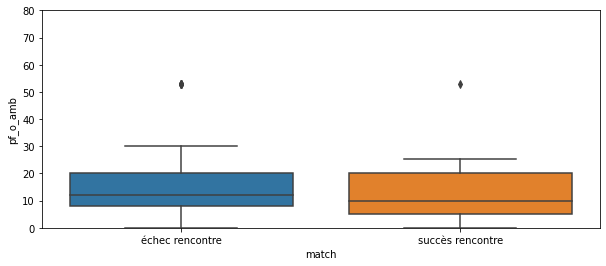

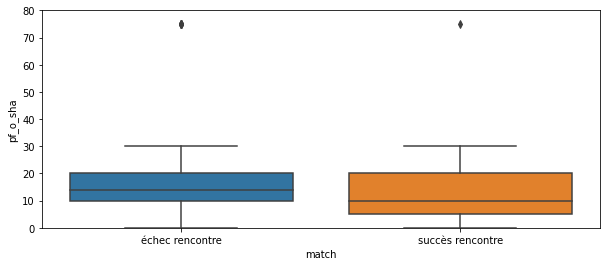

In [75]:
#première visualisation : variables quantitatives recruteur et variable cible
for i in list(df_quanti_recruteur):
  fig, ax = plt.subplots(figsize=(10,4))
  ax.set_ylim(0,80)
  sns.boxplot("match",i, data=df)
  plt.gca().xaxis.set_ticklabels(['échec rencontre','succès rencontre'])


L'ensemble des variables possèdent quelques valeurs atypiques


In [76]:
#sélection des attributs
df_attributs=df[['age','age_o','attr1_1','intel1_1','pf_o_sin']]

In [77]:
#insérer les valeurs des variables quantitatives (non centrées réduites) 
#dans le tableau de valeurs d'origine
for i in list(df_attributs):
  df[i]=df_attributs[i].values

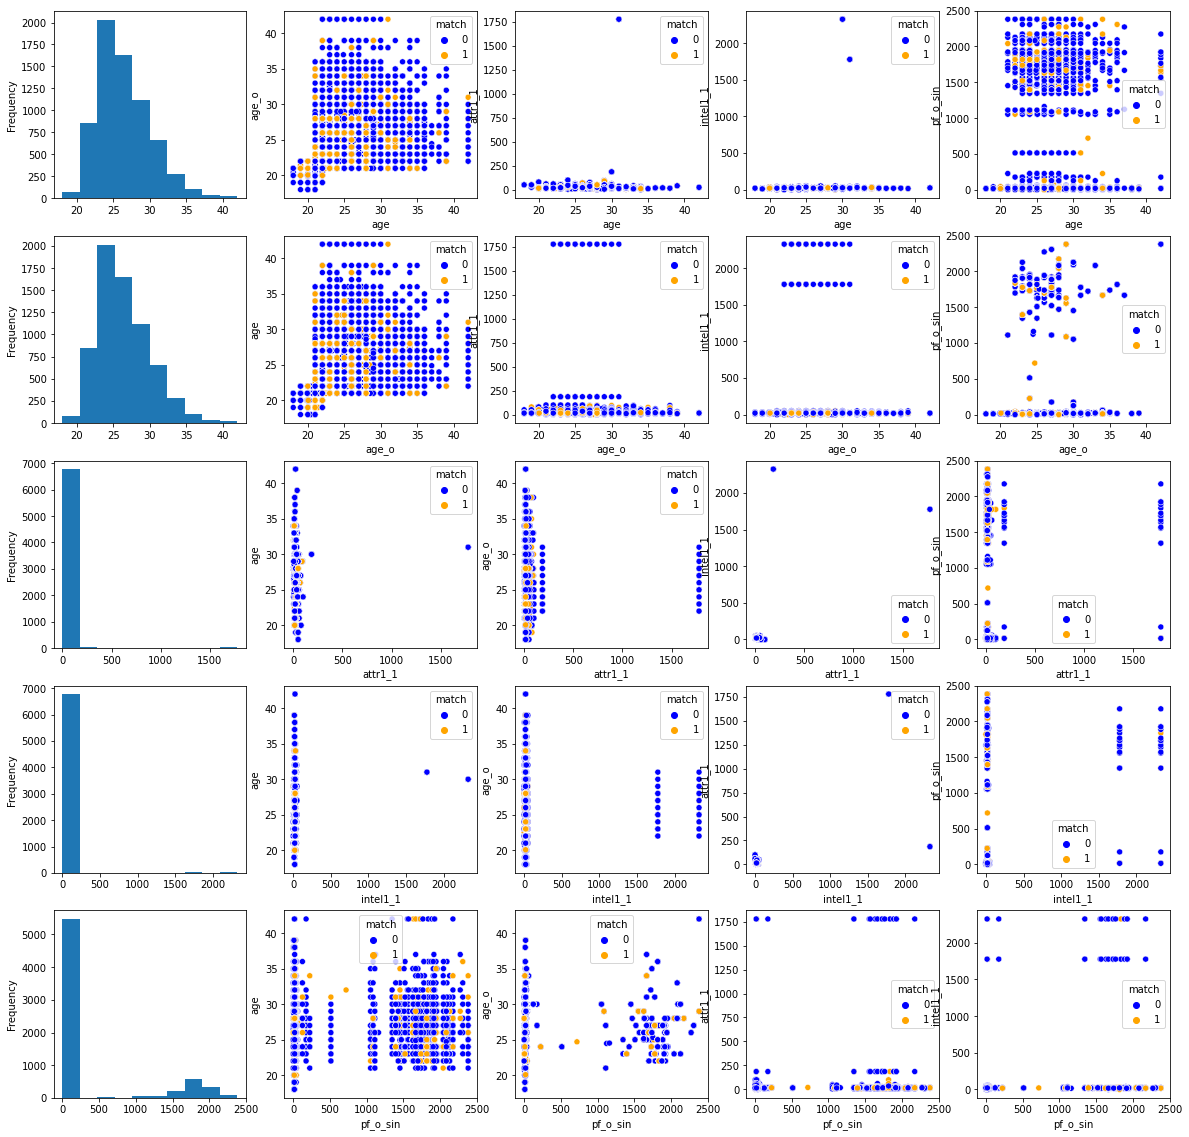

In [78]:
#Croisement des variables quantitatives deux à deux 
#et coloriage des points selon leur groupe d'appartenance par rapport à la variable cible 
df_attributs_match=df_attributs.assign(match=df.match)
import matplotlib.gridspec as gridspec
figure=plt.figure(figsize=(20,20))
k=1
for i in range(5):
  j=0
  plt.subplot(5,5,k)
  df_attributs_match[df_attributs_match.columns[i]].plot.hist(bins=10)
  k=k+1
  while j<=4:
    if j!=i:
      plt.subplot(5,5,k)
      sns.scatterplot(x=df_attributs_match.columns[i],y=df_attributs_match.columns[j],hue='match',data=df_attributs_match,palette=['blue','orange'])
      k=k+1
      j=j+1
    else:
      j=j+1
plt.show()


In [79]:
#Test d'indépendance entre chaque variable quantitative et la variable cible
from scipy.stats import shapiro
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import bartlett

def indep(model,cible,vari) :
  print(vari)

  #normalité des résidus
  statistic,p_valeur=shapiro(model.resid)
  print(f"P-value normalité résidus : {p_valeur}")

  if p_valeur <0.05 :
    print("Rejet de H0: Les résidus ne suivent pas une loi normale (risque erreur : 5 %)")
  else :
    print("Les résidus semblent suivre une loi normale")
  
  #homoscédasticité -> les variances de chaque groupe ne sont pas égales : on ne peut pas faire une ANOVA
  group0 = df[df[cible]==0][vari]
  group1 = df[df[cible]==1][vari]
  stat, p_value = bartlett(group0, group1)
  print(f"P-value homoscédaticité : {p_value}")

  if p_value <0.05:
     print("Rejet de H0: Les variances de chaque groupe ne sont pas égales (risque erreur : 5 %)")
  else :
    print("Les variances de chaque groupe semblent égales")
  
  #Anova 
  anova_table = sm.stats.anova_lm(model,typ=2)
  print(anova_table)

indep(ols('round ~ match', data=df).fit(),'match','round')
indep(ols('int_corr ~ match', data=df).fit(),'match','int_corr')
indep(ols('age_o ~ match', data=df).fit(),'match','age_o')
indep(ols('age ~ match', data=df).fit(),'match','age')
indep(ols('attr1_1 ~ match', data=df).fit(),'match','attr1_1')
indep(ols('intel1_1 ~ match', data=df).fit(),'match','intel1_1')
indep(ols('pf_o_sin ~ match', data=df).fit(),'match','pf_o_sin')

round
P-value normalité résidus : 0.0
Rejet de H0: Les résidus ne suivent pas une loi normale (risque erreur : 5 %)
P-value homoscédaticité : 0.002806579630737649
Rejet de H0: Les variances de chaque groupe ne sont pas égales (risque erreur : 5 %)
                 sum_sq      df          F    PR(>F)
match        227.655193     1.0  13.654244  0.000221
Residual  113408.742808  6802.0        NaN       NaN
int_corr
P-value normalité résidus : 5.312506996539527e-19
Rejet de H0: Les résidus ne suivent pas une loi normale (risque erreur : 5 %)
P-value homoscédaticité : 0.16738699230114834
Les variances de chaque groupe semblent égales
                sum_sq      df        F    PR(>F)
match     4.642657e+03     1.0  5.51638  0.018868
Residual  5.724651e+06  6802.0      NaN       NaN
age_o
P-value normalité résidus : 1.6064107244434335e-39
Rejet de H0: Les résidus ne suivent pas une loi normale (risque erreur : 5 %)
P-value homoscédaticité : 0.006530652769375675
Rejet de H0: Les variances de c

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1760: 

Dans ces résultats, l'hypothèse nulle stipule que les valeurs moyenne des différentes variables quantitatives moyenne pour les deux modalités des match sont égales. Si la p_valeur est inférieure au seuil de signification de 0.05, on peut rejeter l'hypothèse nulle et conclure que la variable cible est dépendante de la variable quantitative considérée.

Cela est la cas pour les deux variables liées à l'âge, match et round.

#Entre les variables qualitatives

pas de lien entre la variable int_corr et variable cible (>5 %)
on en déduit que int_coor n'est pas nécessairement un bon indicateur pour la prévision d'une rencontre concluante

On note un certain nombre de valeurs atypiques pour l'ensemble de ces attributs

In [80]:
#sélection des variables qualitatives
df_quali=df[['gender','condtn','position','order','wave','samerace','race_o','field','from','career','dec_o','zipcode','exphappy','expnum','go_out']]

In [81]:
from scipy.stats import chi2_contingency
p_values_quali = pd.DataFrame(index=['gender','condtn','position','order','wave','samerace','race_o','field','from','career','dec_o','zipcode','exphappy','expnum','go_out'],columns=['gender','condtn','position','order','wave','samerace','race_o','field','from','career','dec_o','zipcode','exphappy','expnum','go_out'])
for i in list(p_values_quali.index):
  for j in list(p_values_quali.index):
    df_count = pd.crosstab(df[i], df[j])
    p_values_quali.loc[i,j] = chi2_contingency(df_count)[1]
print(p_values_quali)

            gender    condtn  position     order      wave  samerace  \
gender         0.0  0.825052       1.0   0.95791       1.0  0.938878   
condtn    0.825052       0.0       0.0       0.0       0.0       0.0   
position       1.0       0.0       0.0       1.0       0.0       0.0   
order      0.95791       0.0       1.0       0.0       0.0  0.014261   
wave           1.0       0.0       0.0       0.0       0.0       0.0   
samerace  0.938878       0.0       0.0  0.014261       0.0       0.0   
race_o         0.0       0.0       0.0  0.999993       0.0       0.0   
field          0.0       0.0       0.0       1.0       0.0       0.0   
from           0.0       0.0       0.0       1.0       0.0       0.0   
career         0.0       0.0       0.0       1.0       0.0       0.0   
dec_o          0.0  0.002478  0.000195  0.051355  0.000012  0.224909   
zipcode        0.0       0.0       0.0       1.0       0.0       0.0   
exphappy       0.0       0.0       0.0       1.0       0.0  0.00

Le test du chi 2 est sensible aux effectifs donc il est assez attendu d'obtenir ces résultats

Cepandant, nous pouvons déjà noté que:

La variable gender est indépendante des variables condtn, position, order, wave et samerace

La variable race_o est indépendante des variables zipcode et exphappy

La variable dec_o est indépendante de la variable expnum

In [82]:
df_quali_bis=df[['round','sinc_o','intel_o','fun_o','amb_o','shar_o','imprelig','imprace','yoga','sports','tvsports','exercise','dining','museums','art','hiking','gaming','clubbing','reading','tv','theater','movies','concerts','music','shopping','goal','date']]
p_values_quali_bis = pd.DataFrame(index=['round','sinc_o','intel_o','fun_o','amb_o','shar_o','imprelig','imprace','yoga','sports','tvsports','exercise','dining','museums','art','hiking','gaming','clubbing','reading','tv','theater','movies','concerts','music','shopping','goal','date'],columns=['round','sinc_o','intel_o','fun_o','amb_o','shar_o','imprelig','imprace','yoga','sports','tvsports','exercise','dining','museums','art','hiking','gaming','clubbing','reading','tv','theater','movies','concerts','music','shopping','goal','date'])
for i in list(p_values_quali_bis.index):
  for j in list(p_values_quali_bis.index):
    df_count = pd.crosstab(df[i], df[j])/2
    p_values_quali_bis.loc[i,j] = chi2_contingency(df_count)[1]
print(p_values_quali_bis)

         round    sinc_o   intel_o     fun_o amb_o shar_o  imprelig imprace  \
round      0.0       1.0       1.0       1.0   1.0    1.0       0.0     0.0   
sinc_o     1.0       0.0       0.0       0.0   0.0    0.0  0.997238     1.0   
intel_o    1.0       0.0       0.0       0.0   0.0    0.0       0.0     0.0   
fun_o      1.0       0.0       0.0       0.0   0.0    0.0       1.0     0.0   
amb_o      1.0       0.0       0.0       0.0   0.0    0.0       1.0     1.0   
shar_o     1.0       0.0       0.0       0.0   0.0    0.0       1.0     1.0   
imprelig   0.0  0.997238       0.0       1.0   1.0    1.0       0.0     0.0   
imprace    0.0       1.0       0.0       0.0   1.0    1.0       0.0     0.0   
yoga       0.0       0.0  0.001012       0.0   1.0    1.0       0.0     0.0   
sports     0.0       0.0   0.99766       0.0   1.0    1.0       0.0     0.0   
tvsports   0.0  0.933971       1.0       0.0   1.0    1.0       0.0     0.0   
exercise   0.0       0.0       1.0  0.000009   1.0  

fun_o est lié aux autres variables sinc_o, intel_o, amb_o, shar_o

gaming est lié aux autres activités, à round, imprelig et imprace mais pas à fun_o (et autres variables)


# Entre les variables qualitatives et la variable cible

In [83]:
df_quali_all=pd.concat([df_quali, df_quali_bis])

In [84]:
from scipy.stats import chi2_contingency
pvaleur_cible=[]
for j in df_quali_all:
  df_counts = pd.crosstab(df[j], df.match)
  Khi2_obs, p_valeur, ddl, effectif_theorique = chi2_contingency(df_counts)
  pvaleur_cible.append(p_valeur)
df_indep_quali_cible=pd.DataFrame(pvaleur_cible,index=df_quali_all.columns,columns=['p_value'])
print(df_indep_quali_cible.sort_values(by=['p_value']))


               p_value
dec_o     0.000000e+00
fun_o     3.350420e-41
zipcode   3.294317e-37
career    8.225055e-35
field     6.988169e-29
from      2.816556e-27
shar_o    1.830943e-13
wave      3.179783e-13
position  6.192464e-09
clubbing  2.385511e-07
go_out    7.665589e-07
date      9.175752e-07
condtn    1.359924e-06
tvsports  2.818629e-06
concerts  4.671427e-06
round     7.184185e-06
race_o    1.124600e-05
sinc_o    6.322418e-05
intel_o   1.910397e-04
exercise  6.729353e-04
music     7.755801e-04
order     1.053066e-03
reading   1.173891e-03
imprelig  1.718479e-03
art       2.000997e-03
theater   7.844211e-03
yoga      2.590085e-02
shopping  2.917754e-02
movies    2.954161e-02
imprace   4.524820e-02
museums   8.031543e-02
hiking    1.660178e-01
tv        1.664590e-01
expnum    2.633240e-01
amb_o     2.943049e-01
dining    3.040470e-01
sports    3.051751e-01
goal      3.821441e-01
exphappy  4.468808e-01
gaming    7.203094e-01
samerace  9.596723e-01
gender    9.823147e-01


Rejeter H0 (indépendance) au seuil de 5% si la p_value < 5% -> variables liées

Donc indépendance entre variable cible (match) et les variables suivantes : gender et samerace 

dec_o est la variable le plus liée à match, ce qui semble cohérent avec le jeu de données

Si on divise df_counts par 3, il reste dec_o, wave, fun_o, condtn, go_out, date, position, race_o, field, career, zipcode, round, from

Si on divise df_counts par 3, il reste uniquement dec_o, condtn, wave et on peut inclure go_out et date

##AFDM

L'AFDM n'est réalisé que sur les variables sélectionnées précédemment.

Si on l'effectue sur toutes les variables (il y en a plus de 1 000, à cause des variables qualitatives -> dummies)

In [112]:
#Récupération des variables quantitatives
#df_quanti=df[['age','income','attr1_1', 'sinc1_1','intel1_1','fun1_1','amb1_1','shar1_1','age_o','pf_o_att','pf_o_sin','pf_o_int','pf_o_fun','pf_o_amb','pf_o_sha']]
df_quanti_afdm=df[['age','attr1_1', 'intel1_1','age_o','pf_o_sin']]

#On centre et on réduit les variables quantitatives (même échelle)
ZQ = (df_quanti_afdm.values-np.mean(df_quanti_afdm.values,axis=0))/np.std(df_quanti_afdm.values,axis=0) 
print(ZQ)

[[ 0.18249001  0.02266989 -0.0141962   0.74193032 -0.49985683]
 [ 0.18249001  0.02266989 -0.0141962  -0.94322604 -0.49273266]
 [ 0.18249001  0.02266989 -0.0141962  -0.94322604 -0.49273266]
 ...
 [-1.50195966 -0.13312106 -0.07793624 -1.22408544 -0.48845815]
 [-1.50195966 -0.13312106 -0.07793624 -1.22408544 -0.51410517]
 [-1.50195966 -0.13312106 -0.07793624  0.18021153 -0.48560848]]


In [123]:
#Récupération des variables qualitatives codées : centrer et réduire
#df_quali_quanti=df[['round','gender','condtn','position','order','wave','samerace','dec_o','exphappy','expnum','attr_o','sinc_o','intel_o','fun_o','amb_o','shar_o','imprelig','imprace','yoga','sports','tvsports','exercise','dining','museums','art','hiking','gaming','clubbing','reading','tv','theater','movies','concerts','music','shopping']]
df_quali_quanti_afdm=df[['condtn','wave','dec_o','exphappy','fun_o','gaming']]

#On centre et on réduit les variables quantitatives (même échelle)
ZQQ = (df_quali_quanti_afdm.values-np.mean(df_quali_quanti_afdm.values,axis=0))/np.std(df_quali_quanti_afdm.values,axis=0) 
print(ZQQ)

[[ 0.48090577  1.66055705 -0.85722177  0.30910347 -1.77128707  0.44307334]
 [ 0.48090577  1.66055705 -0.85722177  0.30910347 -1.77128707  0.44307334]
 [ 0.48090577  1.66055705 -0.85722177  0.30910347 -0.21989474  0.44307334]
 ...
 [-2.07940945 -1.7877659   1.16655926 -1.44494594  1.84862836 -1.11953998]
 [-2.07940945 -1.7877659  -0.85722177 -1.44494594  0.29723603 -1.11953998]
 [-2.07940945 -1.7877659  -0.85722177 -1.44494594  0.81436681 -1.11953998]]


In [139]:
#Récupération des variables quantitatives
#df_qualitatives=df[['race_o','field','from','career','zipcode','goal','date','go_out']]
df_quali_afdm=df[['go_out']]
#codage 0/1 
CQ = pd.get_dummies(df_quali_afdm) 
print(CQ)

      go_out_1.0  go_out_2.0  go_out_3.0  go_out_4.0  go_out_5.0  go_out_6.0  \
0              0           0           0           0           1           0   
1              0           0           0           0           1           0   
2              0           0           0           0           1           0   
3              0           0           0           0           1           0   
4              0           0           0           0           1           0   
...          ...         ...         ...         ...         ...         ...   
6799           1           0           0           0           0           0   
6800           1           0           0           0           0           0   
6801           1           0           0           0           0           0   
6802           1           0           0           0           0           0   
6803           1           0           0           0           0           0   

      go_out_7.0  go_out_Missing value 

In [140]:
#proportions 
p_k = np.mean(CQ.values,axis=0) 

#standardisation des indicatrices 
ZD = CQ.values/np.sqrt(p_k) 
print(ZD)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [1.79275822 0.         0.         ... 0.         0.         0.        ]
 [1.79275822 0.         0.         ... 0.         0.         0.        ]
 [1.79275822 0.         0.         ... 0.         0.         0.        ]]


In [141]:
#assembler tous les blocs
Z = np.concatenate((ZQ,ZQQ,ZD),axis=1) 
print(Z)

[[ 0.18249001  0.02266989 -0.0141962  ...  0.          0.
   0.        ]
 [ 0.18249001  0.02266989 -0.0141962  ...  0.          0.
   0.        ]
 [ 0.18249001  0.02266989 -0.0141962  ...  0.          0.
   0.        ]
 ...
 [-1.50195966 -0.13312106 -0.07793624 ...  0.          0.
   0.        ]
 [-1.50195966 -0.13312106 -0.07793624 ...  0.          0.
   0.        ]
 [-1.50195966 -0.13312106 -0.07793624 ...  0.          0.
   0.        ]]


In [90]:
pip install fanalysis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [142]:
import fanalysis
from fanalysis.pca import PCA 
#instanciation - les données sont déjà standardisées 
afdm = PCA(std_unit=False,row_labels=df.index,col_labels=[df_quanti_afdm.columns,df_quali_quanti_afdm.columns,CQ.columns]) 
#lancement des calculs 
afdm.fit(Z)

PCA(col_labels=[Index(['age', 'attr1_1', 'intel1_1', 'age_o', 'pf_o_sin'], dtype='object'),
                Index(['condtn', 'wave', 'dec_o', 'exphappy', 'fun_o', 'gaming'], dtype='object'),
                Index(['go_out_1.0', 'go_out_2.0', 'go_out_3.0', 'go_out_4.0', 'go_out_5.0',
       'go_out_6.0', 'go_out_7.0', 'go_out_Missing value'],
      dtype='object')],
    row_labels=RangeIndex(start=0, stop=6804, step=1), std_unit=False)

#Valeurs propres

In [143]:
#affichage des valeurs propres 
valpropres=afdm.eig_[0]
print(valpropres)

[1.84594741e+00 1.57090581e+00 1.47467074e+00 1.23367372e+00
 1.14581936e+00 1.07440364e+00 1.03085008e+00 1.00867092e+00
 1.00596994e+00 9.52894489e-01 9.42589802e-01 9.15758224e-01
 8.22880551e-01 7.62132710e-01 6.95368666e-01 6.08160565e-01
 5.95443192e-01 3.13860171e-01 8.56439745e-32]


In [144]:
n=len(valpropres)
print(n)

19


[3.547739657143682, 2.5477396571436826, 2.0477396571436817, 1.7144063238103484, 1.4644063238103484, 1.2644063238103487, 1.097739657143682, 0.9548825142865391, 0.8298825142865391, 0.718771403175428, 0.6187714031754279, 0.5278623122663371, 0.44452897893300375, 0.36760590200992677, 0.2961773305813553, 0.22951066391468866, 0.16701066391468866, 0.10818713450292397, 0.05263157894736842]
19


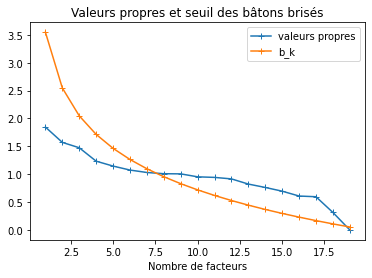

In [145]:
liste_b=[]
for i in range(1,n+1):
  b=0
  for j in range (i,n+1):
    b=b+1/j
  liste_b.append(b)
print(liste_b)
print(len(liste_b))

#matrice ligne des entiers de 1 à n
x=[i for i in range(1,n+1)]

#préparer le graphique
plt.xlabel("Nombre de facteurs")
plt.ylabel("")
plt.title("Valeurs propres et seuil des bâtons brisés")
#ajout des valeurs propres
plt.plot(x,valpropres,'+-',label="valeurs propres")
plt.plot(x,liste_b,'+-',label="b_k")
plt.legend()
plt.show()

On ne conserve que les 5 premières composantes (éventuellement 6 ou 7)

In [146]:
#dir(afdm)

#Contribution et qualité de la restitution des variables sur les composantes

In [147]:
df_all=pd.concat([df_quanti_afdm,df_quali_quanti_afdm,CQ])

In [150]:
#contribution des variables sur les six premières composantes
print(pd.DataFrame(afdm.col_contrib_[:,:5],columns=['F1','F2','F3','F4','F5'],index=df_all.columns))

                             F1         F2         F3         F4         F5
age                    6.934050  14.056311   1.023133   0.567463   6.941068
attr1_1               35.701408   5.153375   0.485813   3.217516   0.014401
intel1_1              35.523319   4.490514   0.904093   1.899027   0.581149
age_o                  0.290875  11.920854   4.084238   0.000116   2.326047
pf_o_sin               1.704754   0.454573   0.356000   0.667114  36.344466
condtn                 1.563010  18.071211   2.006489   1.395875   3.589744
wave                   0.306624  23.009413   6.009343   3.255130   0.575296
dec_o                  2.834337   4.458640  30.744700   2.337946   0.023614
exphappy               0.533213   0.480078   3.721611  37.715427   0.473051
fun_o                  2.298818   4.746456  31.839975   4.415952   0.155832
gaming                 1.664985   0.629460   7.740348  27.035211   9.908059
go_out_1.0             1.559725   3.063032   0.092358   2.557025   4.513501
go_out_2.0  

Le premier axe concerne le profil du candidat et son lien avec la recherche d'une candidature

Le second axe concerne la vague (numéro de vague, âge des participants, etc)

Le troisième axe concerne le recruteur

Le quatrième concerne l'état d'esprit avec lequel le candidat aborde ces rencontres (lien avec ses activités)

Le quatrième concerne l'état d'esprit avec lequel le recruteur aborde ces rencontres


In [151]:
#qualité de la représentation des variables sur les six premières composantes
print(pd.DataFrame(afdm.col_cos2_[:,:5],columns=['F1','F2','F3','F4','F5'],index=df_all.columns))

                            F1        F2        F3        F4        F5
age                   0.127999  0.220811  0.015088  0.007001  0.079532
attr1_1               0.659029  0.080955  0.007164  0.039694  0.000165
intel1_1              0.655742  0.070542  0.013332  0.023428  0.006659
age_o                 0.005369  0.187265  0.060229  0.000001  0.026652
pf_o_sin              0.031469  0.007141  0.005250  0.008230  0.416442
condtn                0.028852  0.283882  0.029589  0.017221  0.041132
wave                  0.005660  0.361456  0.088618  0.040158  0.006592
dec_o                 0.052320  0.070041  0.453383  0.028843  0.000271
exphappy              0.009843  0.007542  0.054882  0.465285  0.005420
fun_o                 0.042435  0.074562  0.469535  0.054478  0.001786
gaming                0.030735  0.009888  0.114145  0.333526  0.113528
go_out_1.0            0.041796  0.069851  0.001977  0.045794  0.075076
go_out_2.0            0.002215  0.052674  0.047989  0.012221  0.043764
go_out

La qualité de la représentation est en lien avec les contributions des variables sur chaque composante